# 1. Linear Regression by Hand

In [30]:
import pandas as pd
import numpy as np

In [18]:
housing_data = pd.read_csv('../data/train.csv')
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [41]:
# housing_data.columns
X = housing_data[["1stFlrSF", "2ndFlrSF", "TotalBsmtSF"]].values
X
X.shape

(1460, 3)

In [25]:
Y = housing_data["SalePrice"].values
Y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [28]:
Xt = X.T
Xt

array([[ 856, 1262,  920, ..., 1188, 1078, 1256],
       [ 854,    0,  866, ..., 1152,    0,    0],
       [ 856, 1262,  920, ..., 1152, 1078, 1256]])

In [32]:
firsthalf = np.linalg.inv(Xt @ X)
firsthalf

array([[ 9.72229569e-09, -9.04229234e-10, -9.92100300e-09],
       [-9.04229234e-10,  3.11546742e-09,  1.51218592e-10],
       [-9.92100300e-09,  1.51218592e-10,  1.08427722e-08]])

In [34]:
secondhalf  = Xt @ Y
secondhalf

array([334249040182, 107813489076, 310514509527])

In [43]:
beta = firsthalf @ secondhalf
beta

array([71.56451306, 80.60722621, 67.05575936])

In [47]:
Y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [48]:
Yhat = X @ beta
Yhat

array([187497.52437894, 174938.78379762, 197336.50852855, ...,
       255126.40089751, 149432.65367182, 174107.06216308])

In [49]:
Ymean = np.mean(Y)
Ymean

180921.19589041095

In [50]:
SSResidual = np.sum((Y - Yhat)**2)
SSResidual

3564628519726.6025

In [51]:
SSTotal = np.sum((Y - Ymean)**2)
SSTotal

9207911334609.977

R2 = 1 - (SSResidual / SSTotal)
R2

# 2. More Features

In [65]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [66]:
housing_data = pd.read_csv('../data/train.csv')
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
listOfFeatures = [
    "1stFlrSF",
    "2ndFlrSF",
    "TotalBsmtSF",
    "LotArea",
    "OverallQual",
    "GrLivArea",
    "GarageCars",
    "GarageArea",
]
listOfFeatures

['1stFlrSF',
 '2ndFlrSF',
 'TotalBsmtSF',
 'LotArea',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea']

In [70]:
X_map = {}
for i in range(1, len(listOfFeatures)+1):
    f = listOfFeatures[:i]
    X_map[i] = housing_data[f].values
# print(X_map)

In [71]:
y = housing_data["SalePrice"]

In [72]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [75]:
y_map = {}
for i in range(1, len(listOfFeatures)+1):
    model = model.fit(X_map[i], y)
    y_map[i] = model.predict(X_map[i])
print(y_map)    

{1: array([142745.979416  , 193293.23203759, 150714.01923813, ...,
       184080.18599326, 170385.11754899, 192546.22830427]), 2: array([179398.63021335, 166087.28893778, 189602.25606063, ...,
       252110.15135304, 139646.52980592, 165225.09027044]), 3: array([185243.16792539, 173378.54847621, 195761.34817761, ...,
       257323.67403307, 146053.79890677, 172487.52403373]), 4: array([185031.39117965, 173169.59216975, 196041.9431898 , ...,
       256457.98146936, 146213.06868674, 172364.17868067]), 5: array([205728.39076149, 172584.55397212, 213292.98290877, ...,
       246053.69003986, 128608.10405411, 143432.45692121]), 6: array([205935.18695559, 172662.63672698, 213510.90567037, ...,
       246401.13362265, 128734.66475844, 143583.95024375]), 7: array([206958.50366377, 177224.07417002, 213875.37929395, ...,
       226567.83636695, 121638.15918103, 135066.99978687]), 8: array([207528.1487993 , 176093.99542728, 215249.62572447, ...,
       225824.29822826, 120909.76517778, 134665.877

In [76]:
from sklearn.metrics import r2_score

In [77]:
for i in range(1, len(listOfFeatures)+1):
    score = r2_score(y, y_map[i])
    print(f"R^2 = {score:4.3f}")

R^2 = 0.367
R^2 = 0.571
R^2 = 0.615
R^2 = 0.616
R^2 = 0.751
R^2 = 0.751
R^2 = 0.767
R^2 = 0.768


## ploting actual vs predictions

In [79]:
import matplotlib.pyplot as plt

# This cryptic line below is a "magic" command in jupyter to make the
# matplotlib plots high resolution
%config InlineBackend.figure_format = "retina"

In [80]:
# These commands adjust various font sizes in the matplotlib plots.
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["axes.titlesize"] = 18

In [83]:

def comparison_plot(actual, predictions):

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(actual, predictions)
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
    ax.set_title("Home Price Predictions")

    formatter = lambda x, pos: f"${int(x/1000):,}K"
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)

    # Make the axis limits equal so that the figure
    # is perfectly square.
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    lim = (min(xmin, ymin), max(xmax, ymax))
    ax.set_xlim(lim)
    ax.set_ylim(lim)

    # Plot a 1:1 line to show where a perfect model's points would lie.
    line = np.linspace(lim[0], lim[1], 201)
    ax.plot(line, line, color="red", linestyle="dashed")
    return ax



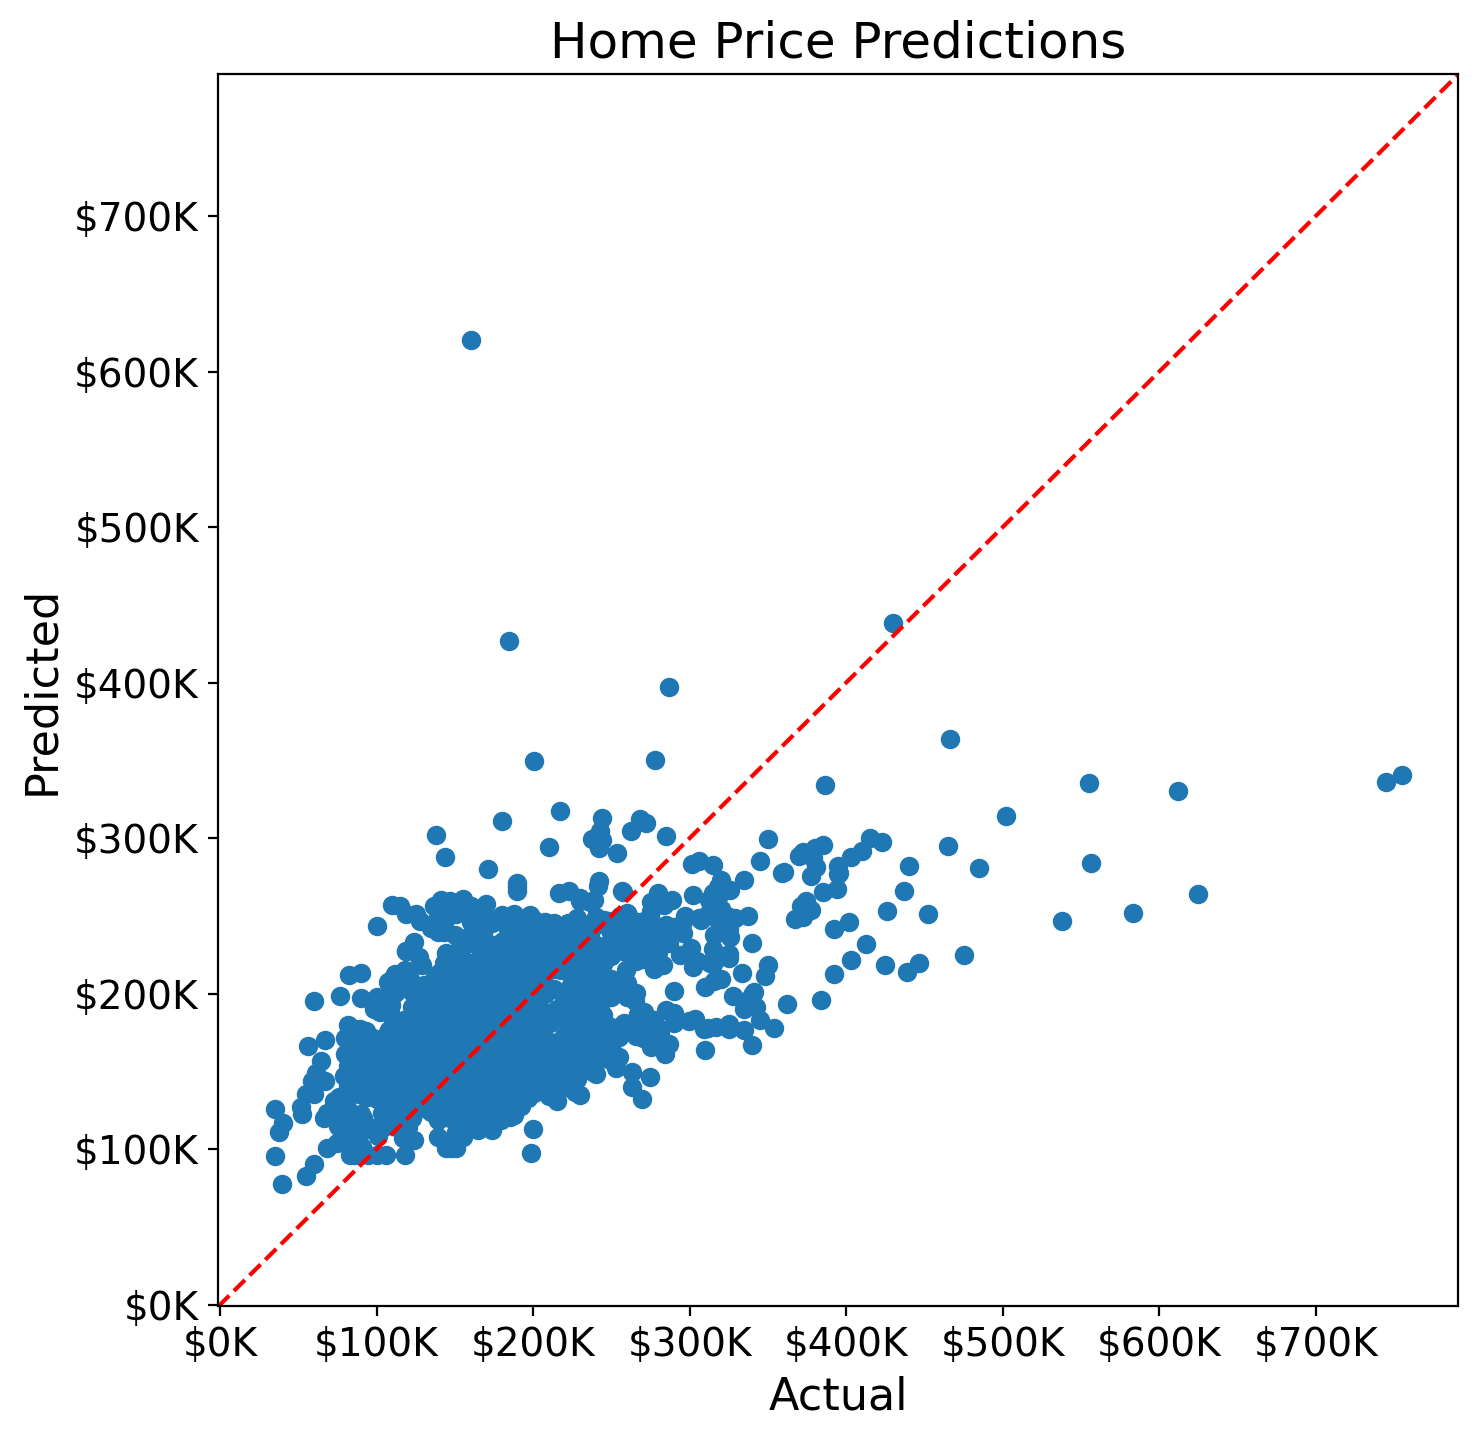

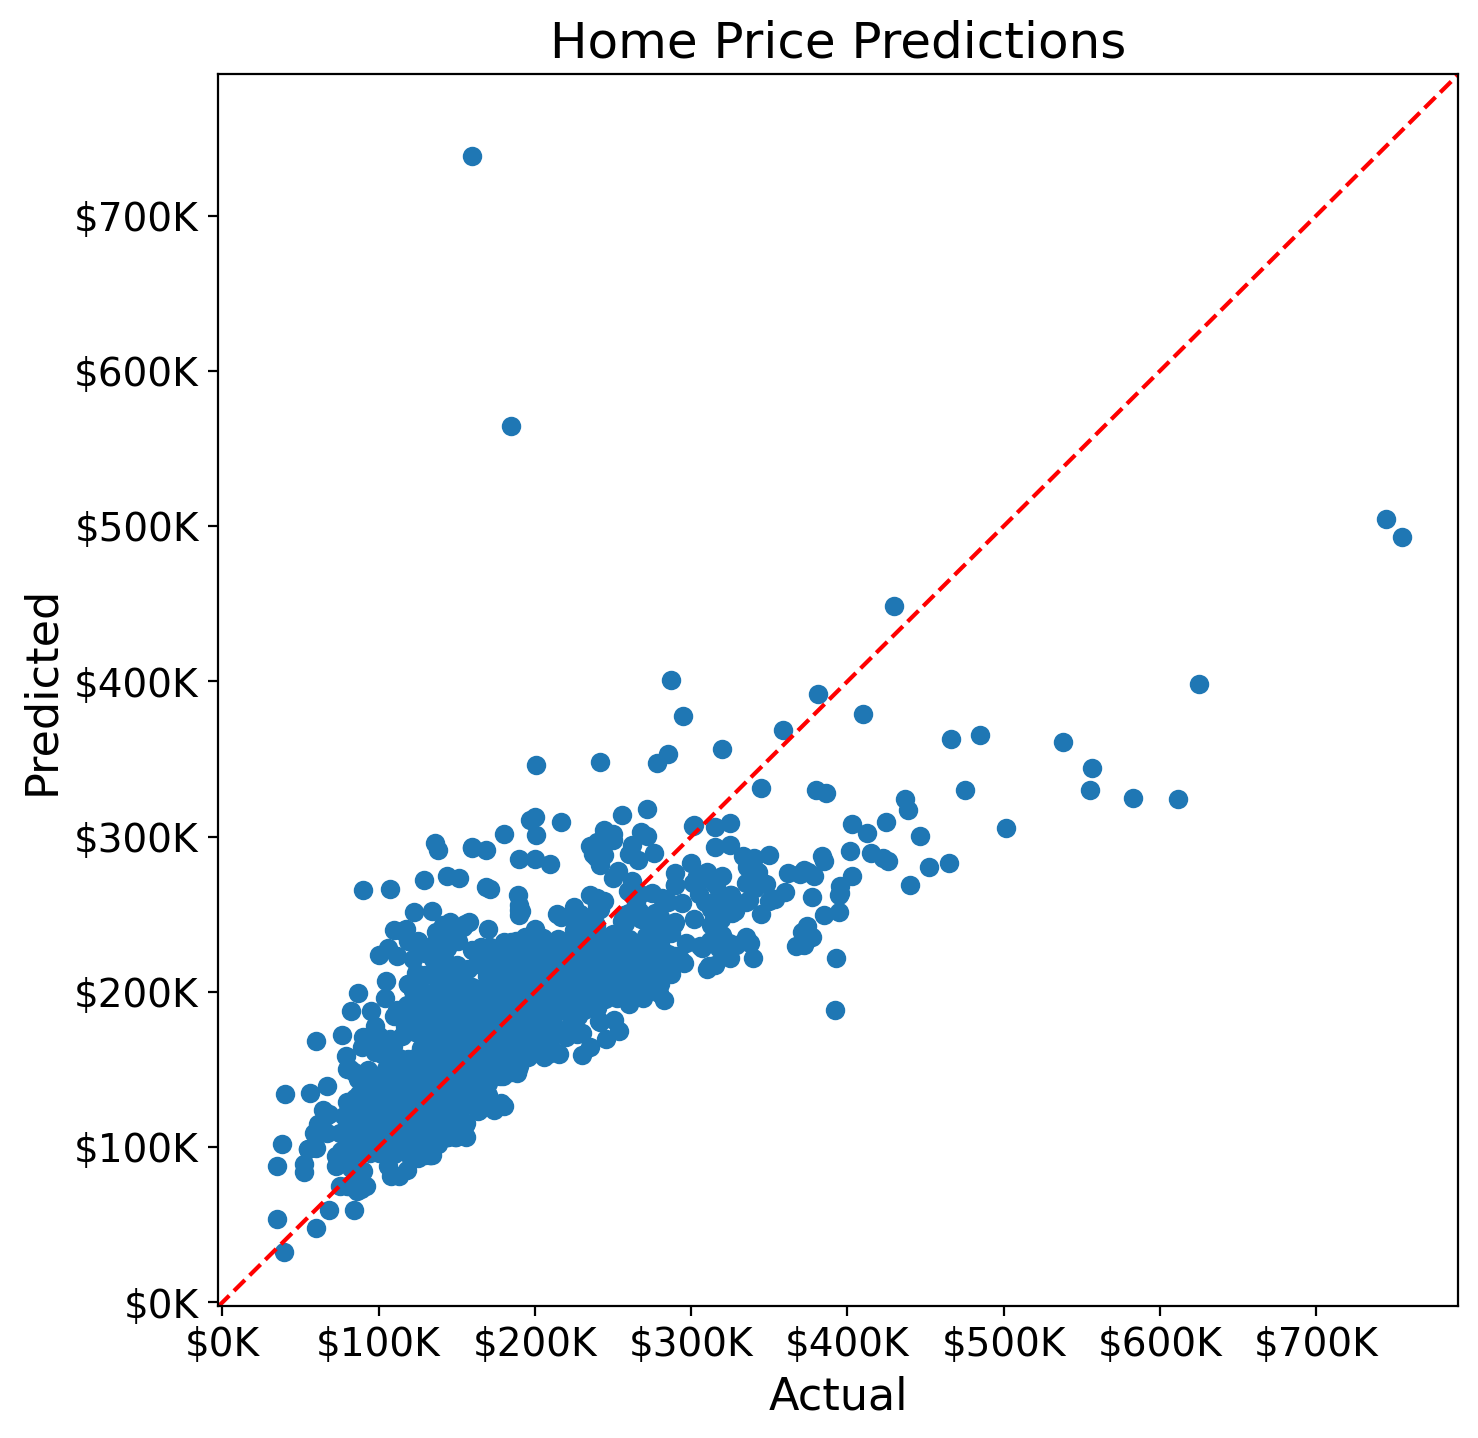

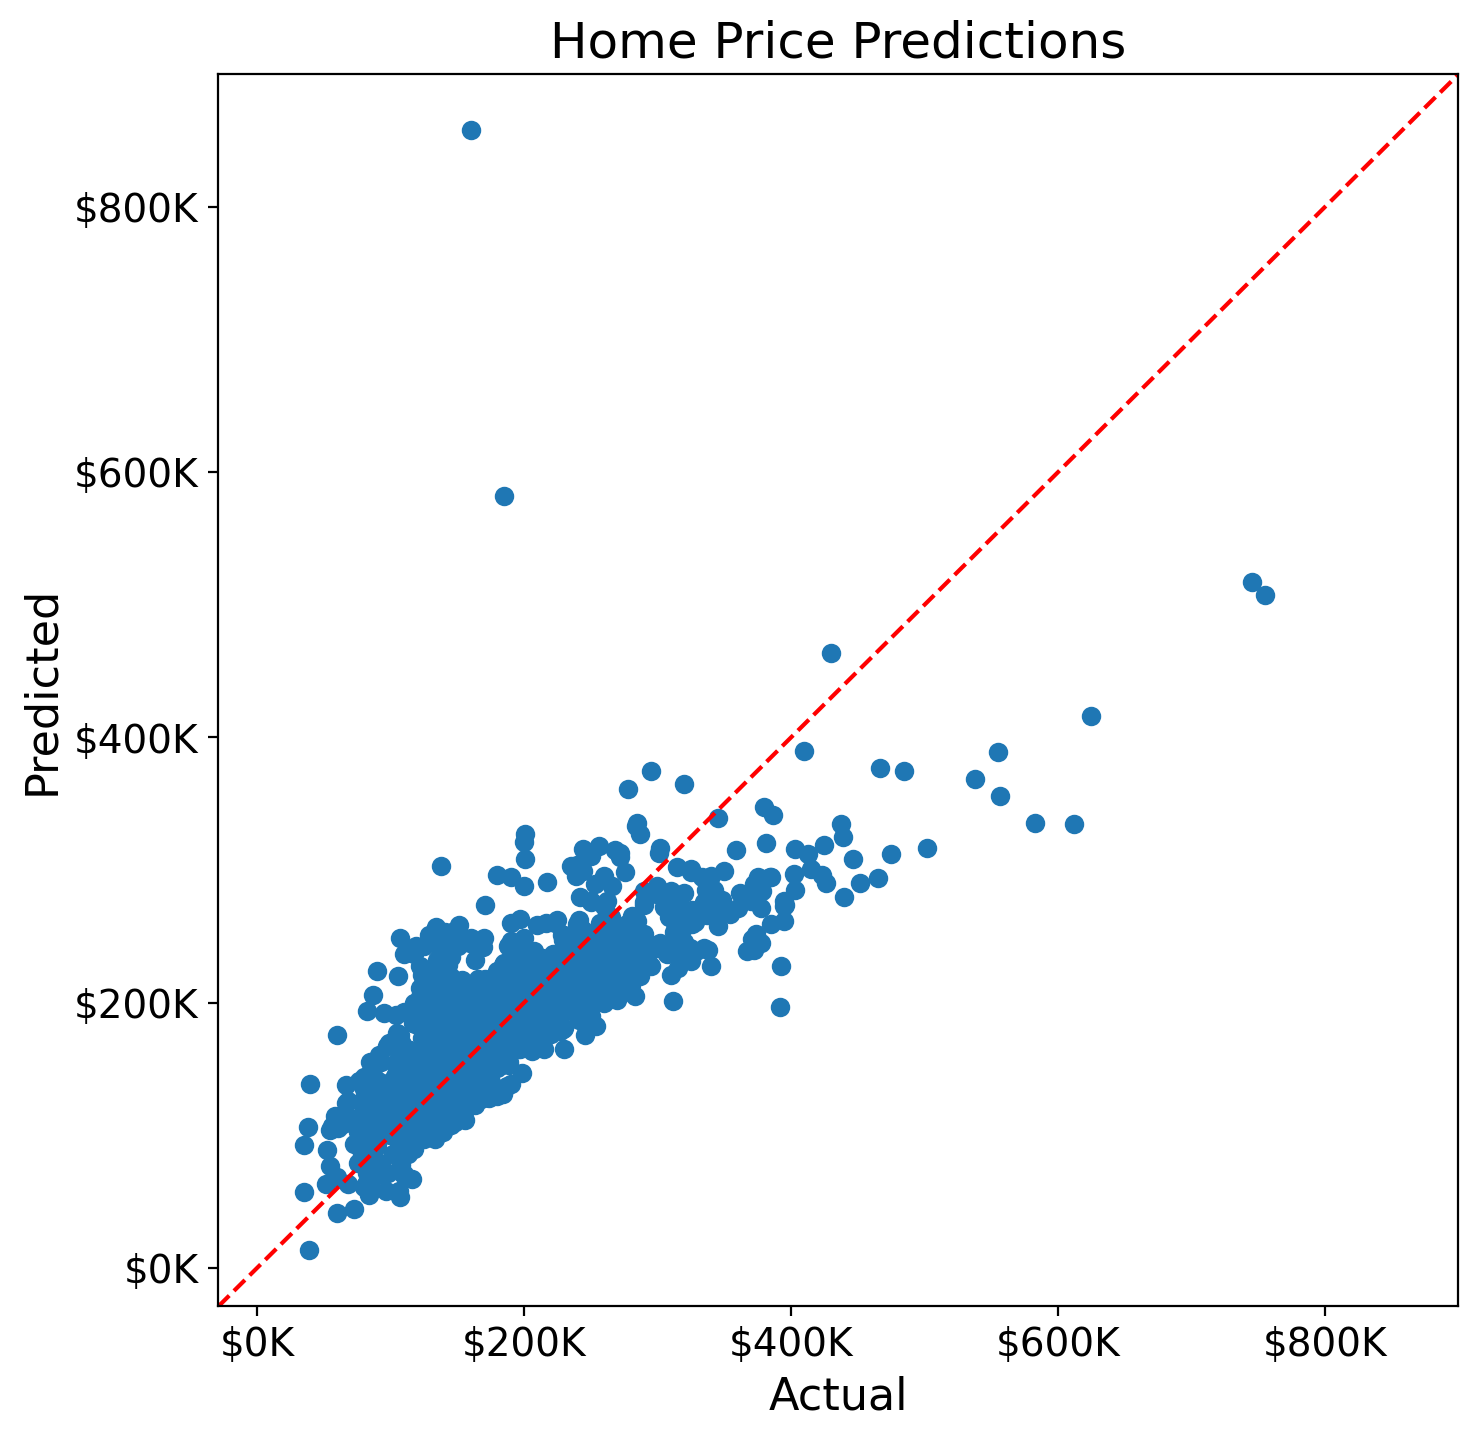

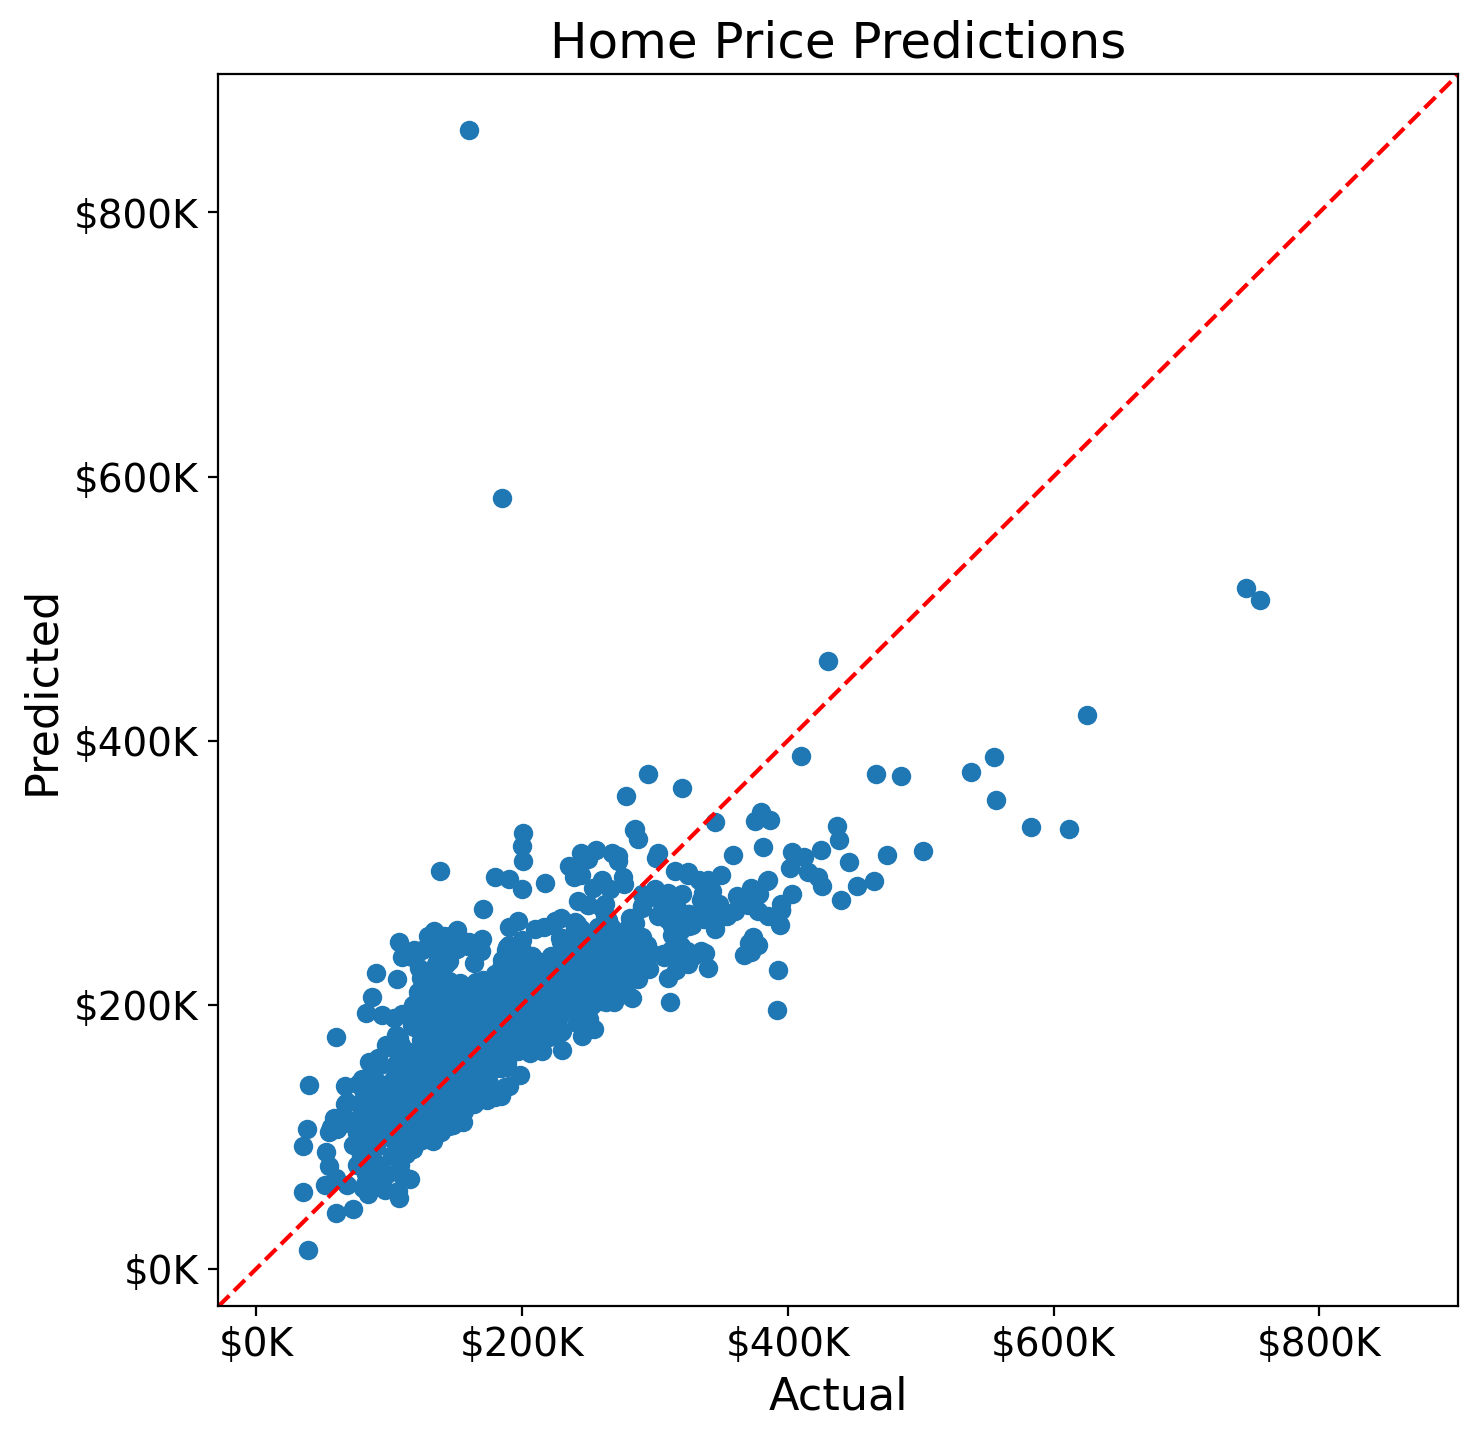

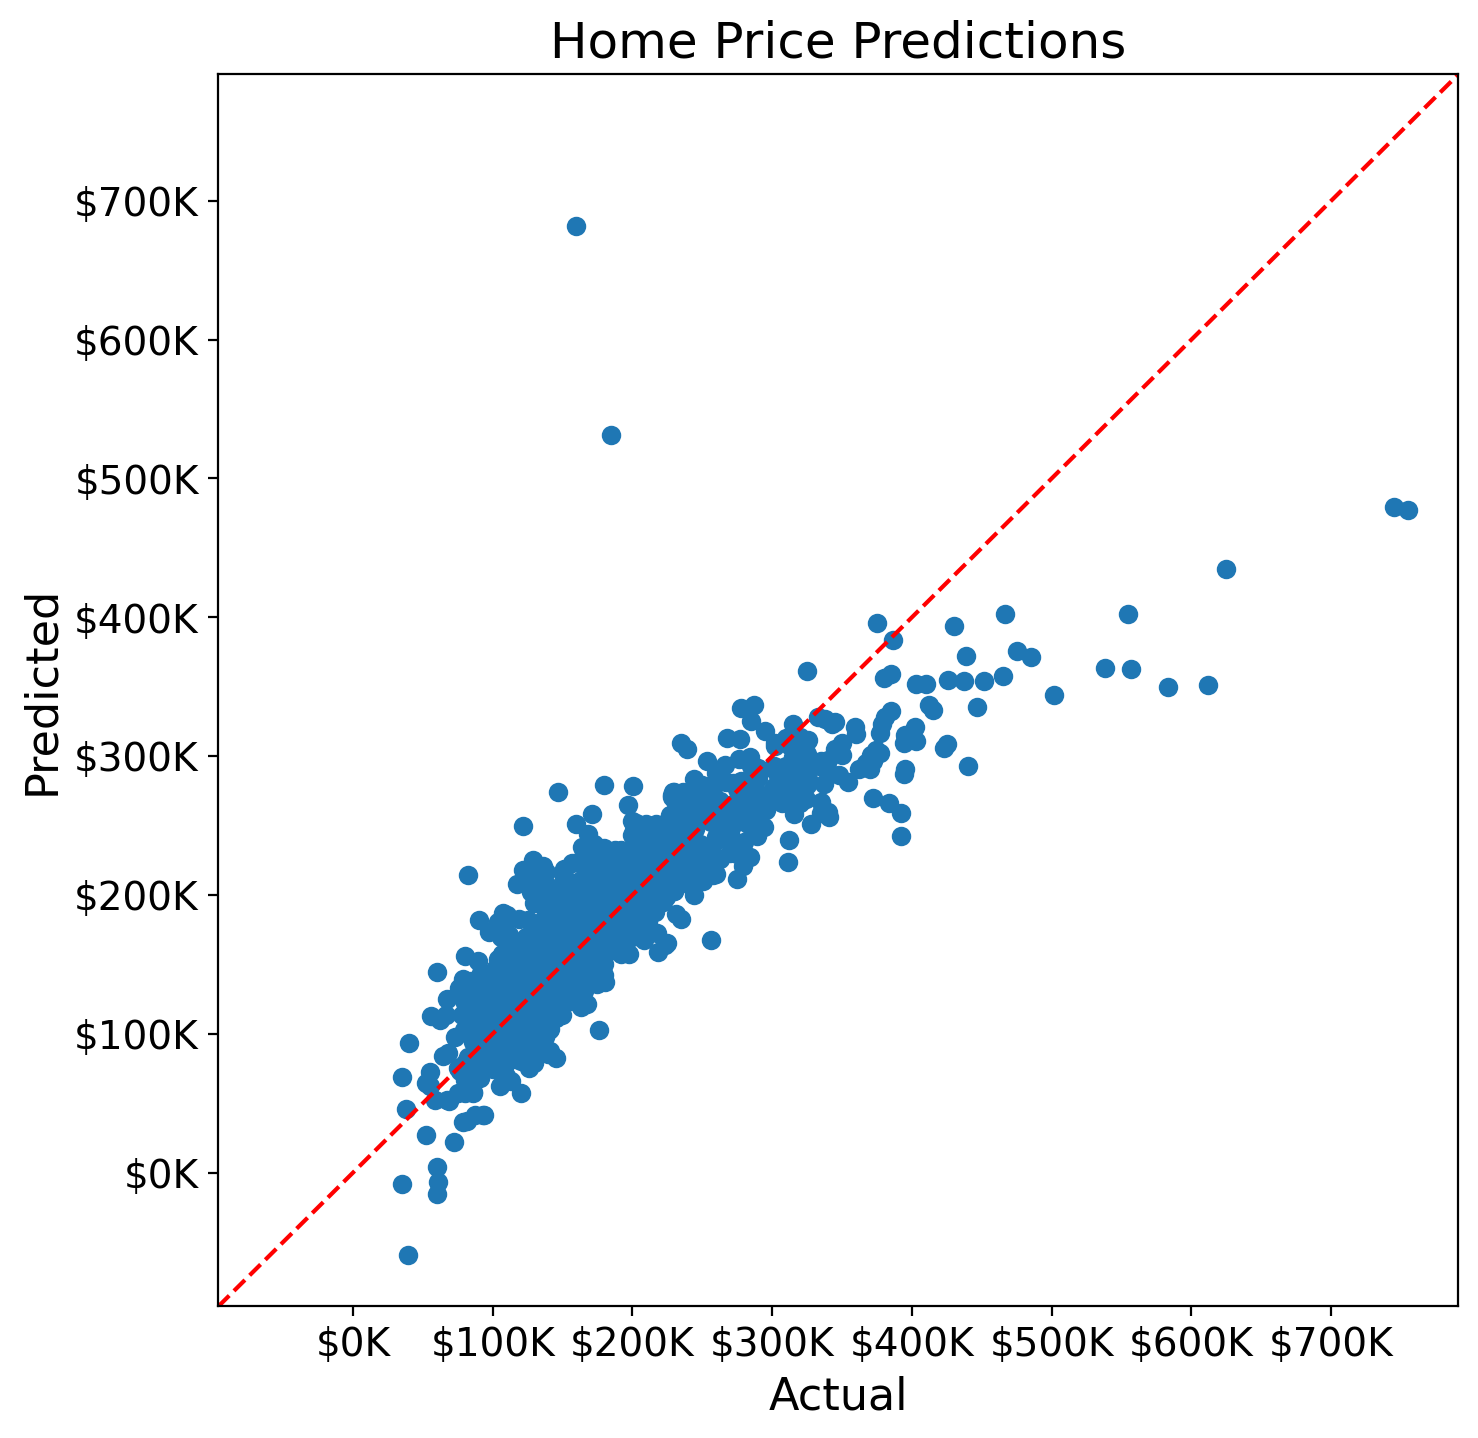

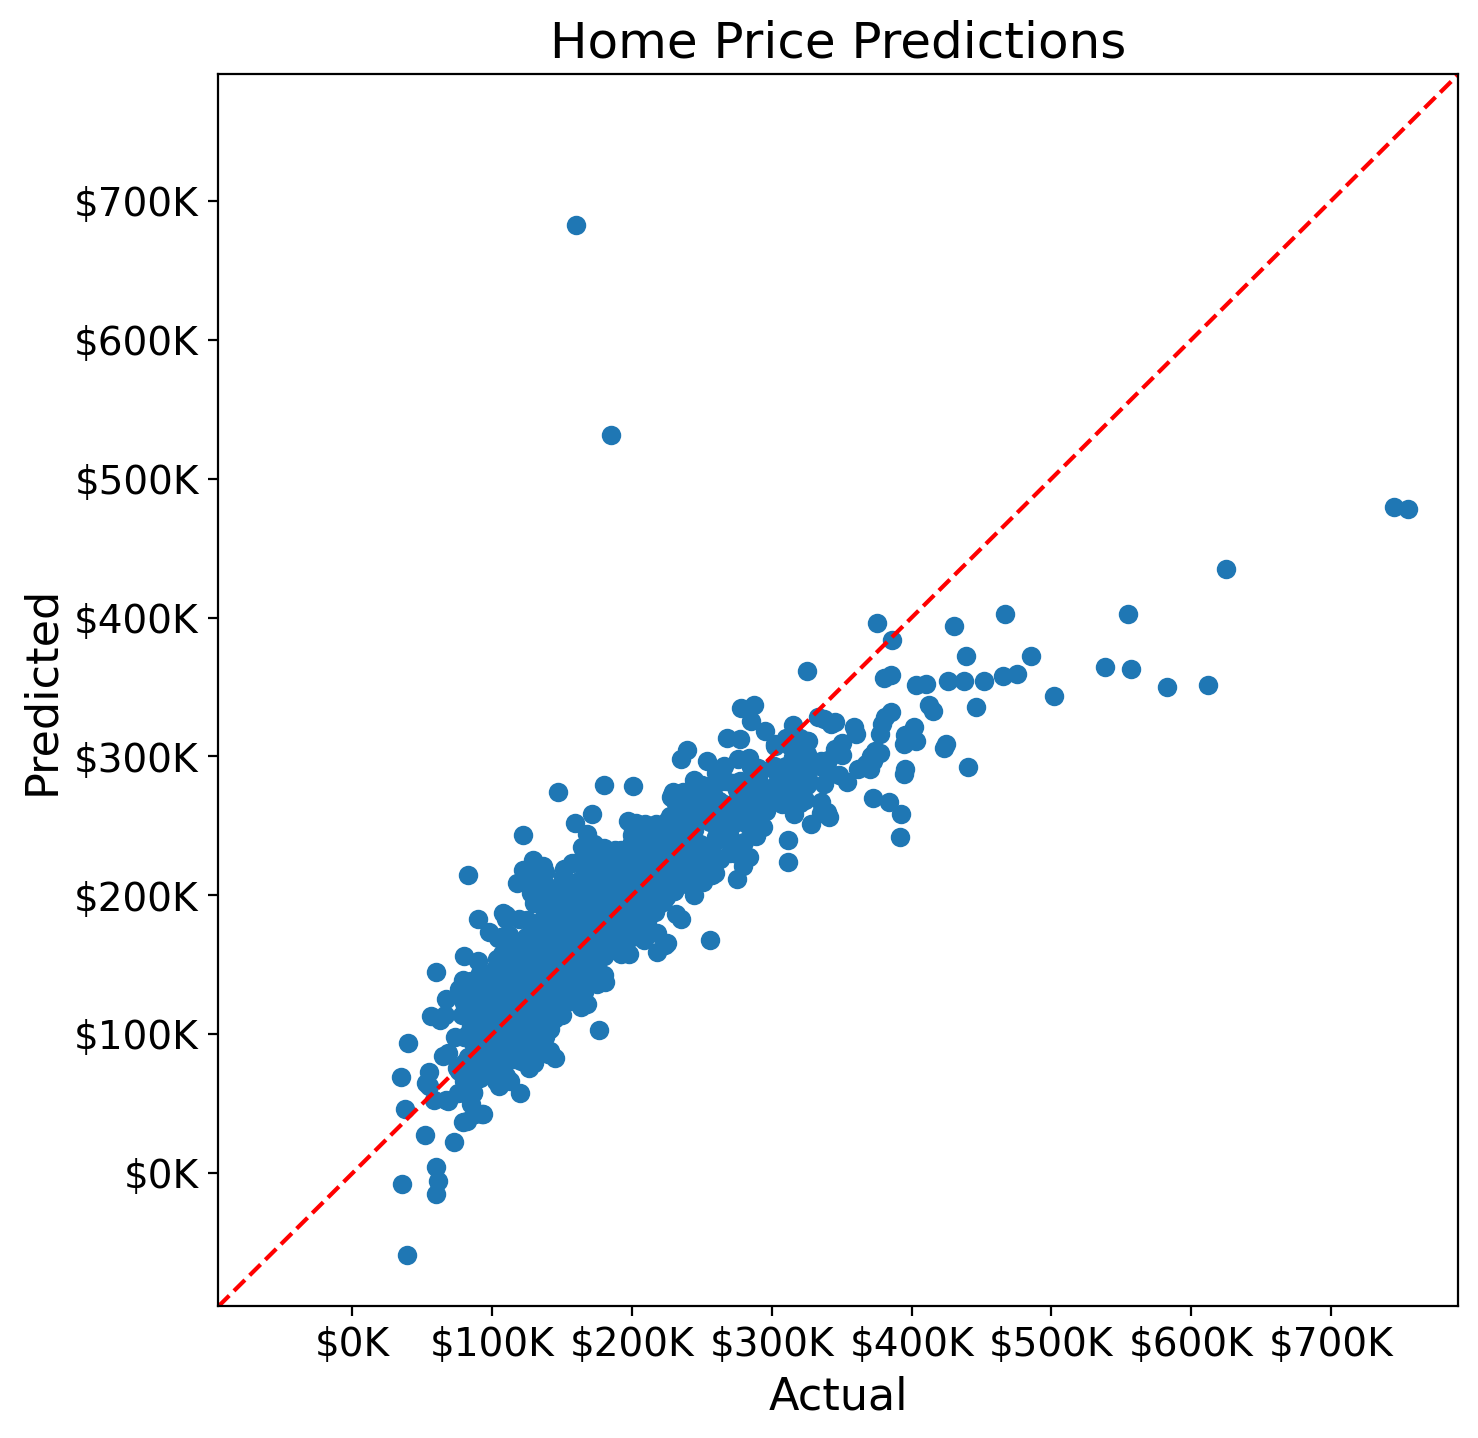

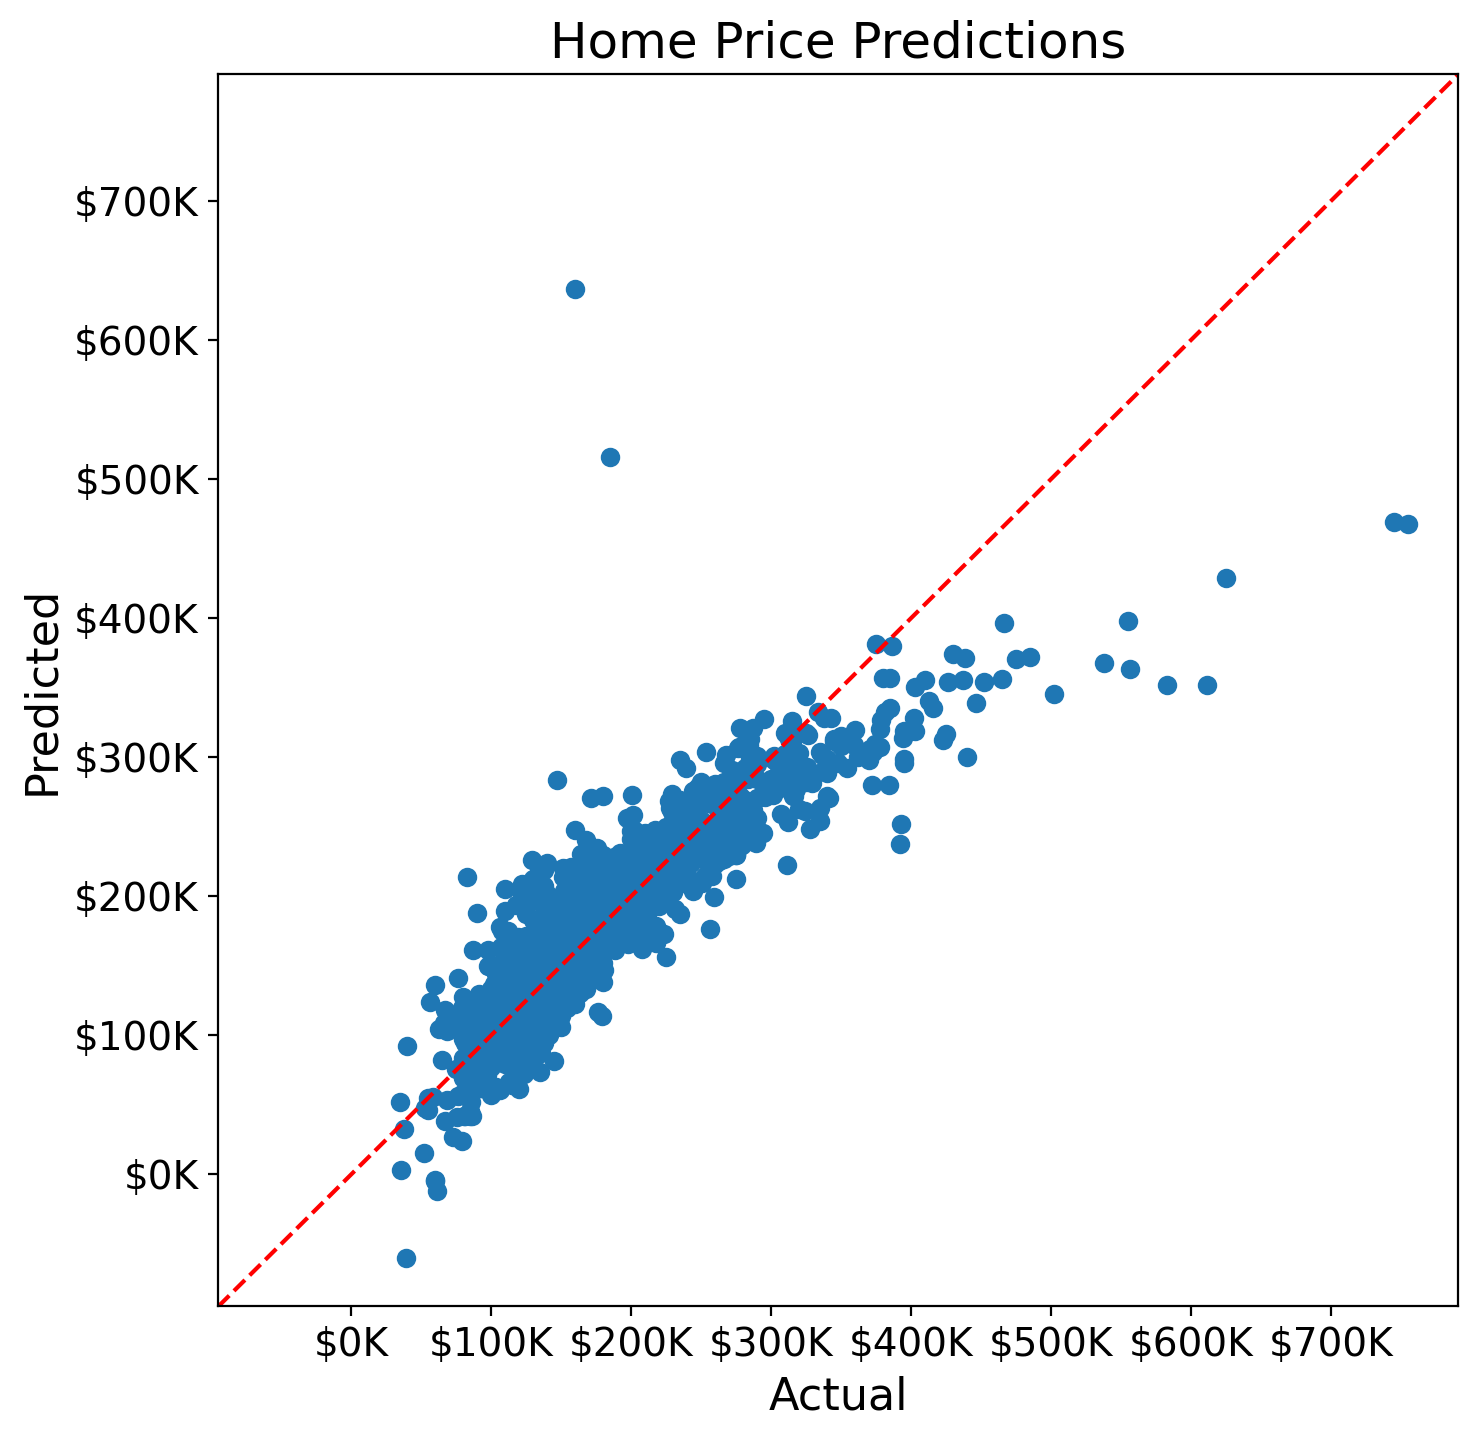

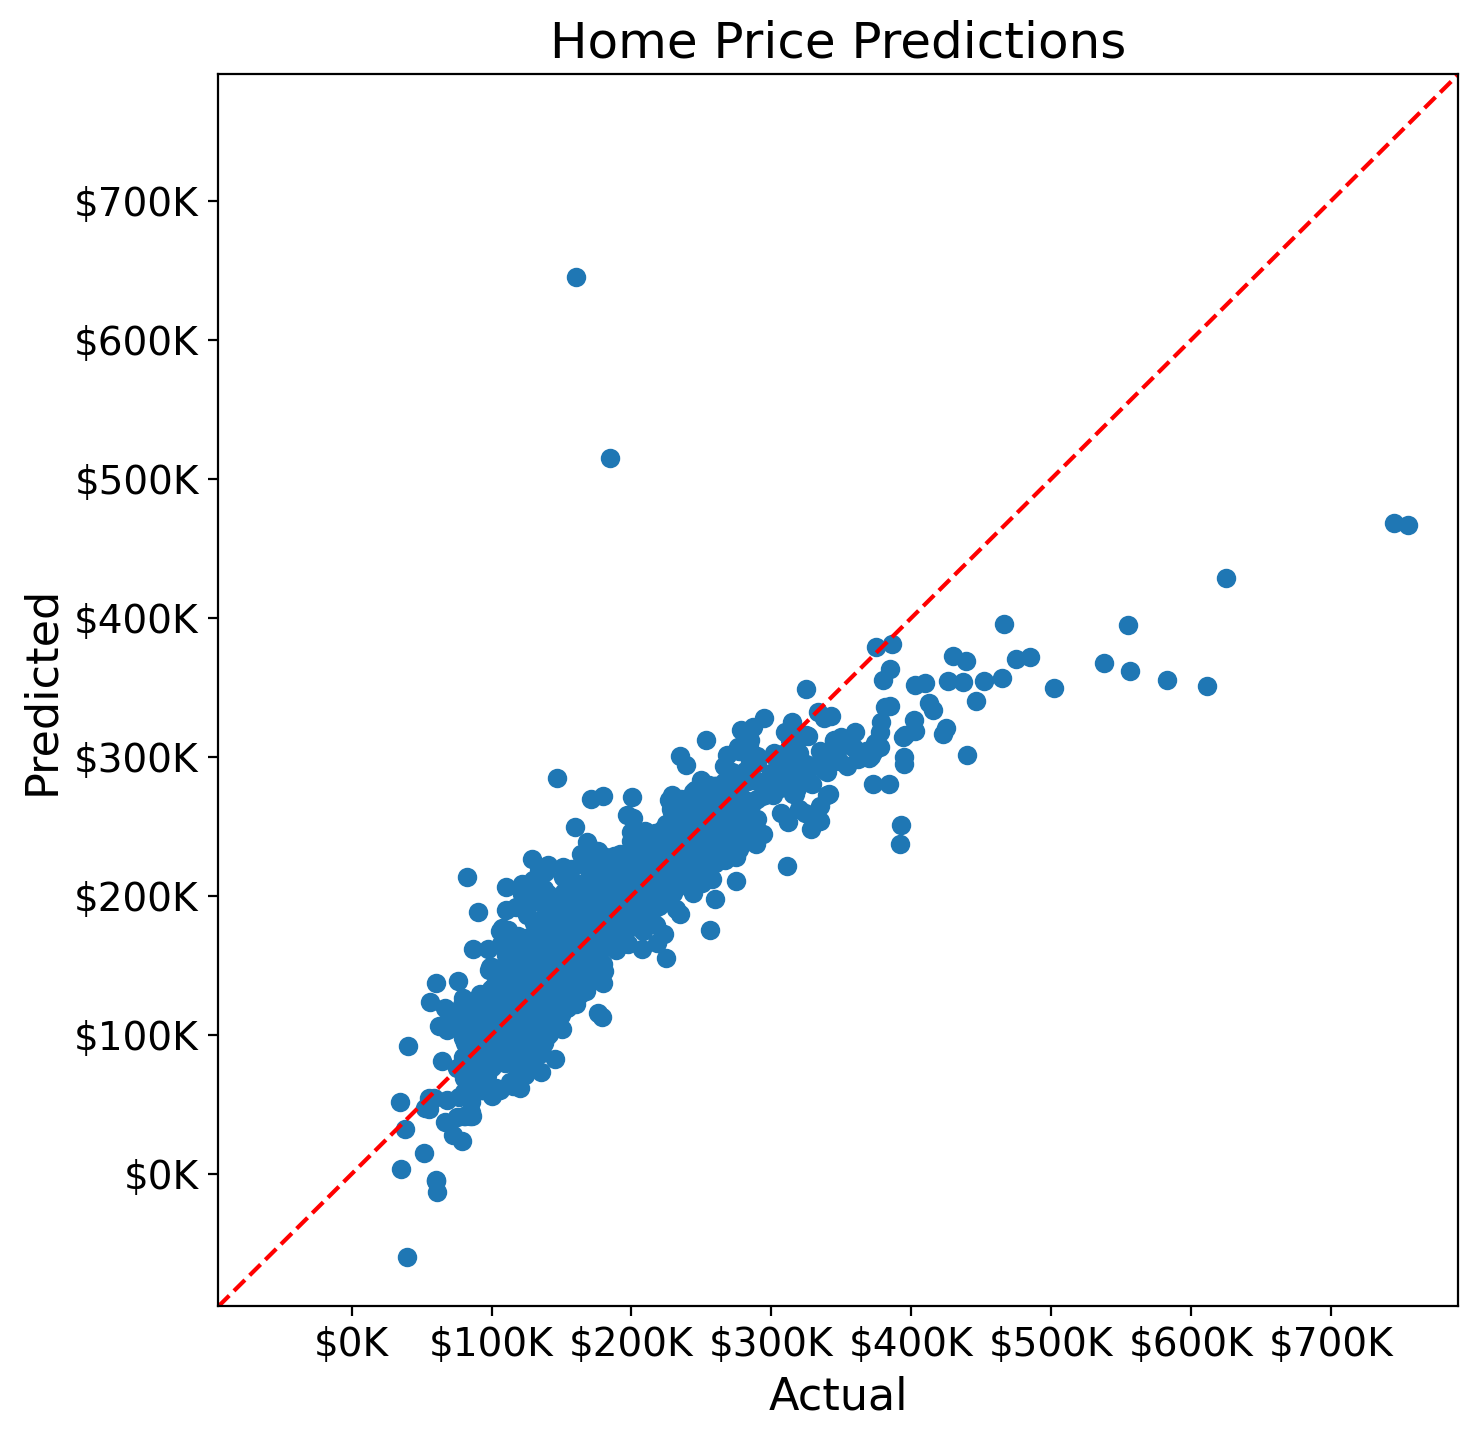

In [85]:
for i in range(1, len(listOfFeatures)+1):
    ax = comparison_plot(y, y_map[i])